# Import Modules

In [6]:
import pandas as pd
import numpy as np

import utils

# Load Data

In [10]:
target_vegetable = "トマト"
train_size = 4000

In [11]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")
temps = pd.read_csv("./data/temp_features.csv")
temps = temps.drop(columns=["max_temp_time", "min_temp_time"])
temps = temps.interpolate(limit=None, limit_direction='both')
train = pd.concat([train, temps], axis=1)

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size, T=10)

# Training

In [12]:
future = target_values.shape[0] - train_size
pred_y, _ = utils.pipeline_rnn(train_x, train_y, train, test, test_y, future=future, num_epochs=200)

training loss = 0.9992468953132629
test loss = 0.8450906872749329
training loss = 0.2516304850578308
test loss = 1.0752280950546265
training loss = 0.11599705368280411
test loss = 0.9904786944389343
training loss = 0.09750261157751083
test loss = 0.7054027318954468
training loss = 0.09473657608032227
test loss = 0.7110393047332764
training loss = 0.09489667415618896
test loss = 0.6050041317939758
training loss = 0.09547892212867737
test loss = 0.575559675693512
training loss = 0.0929865688085556
test loss = 0.6111666560173035
training loss = 0.09272662550210953
test loss = 0.5706667304039001
training loss = 0.09179189056158066
test loss = 0.5183896422386169
training loss = 0.09187747538089752
test loss = 0.5225546956062317
training loss = 0.09049735218286514
test loss = 0.4770432114601135
training loss = 0.0944511890411377
test loss = 2.1480119228363037
training loss = 0.09050533920526505
test loss = 0.5839245319366455
early stop at: 0.43914419412612915


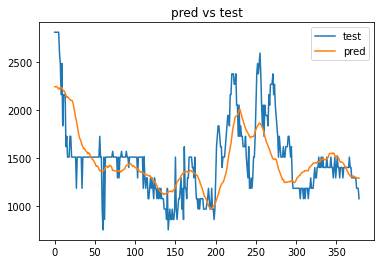

In [13]:
pred_y = pred_y.detach().numpy()
pred = np.concatenate([pred_y.reshape(-1, 1), test[:, 1:]], axis=1)

utils.plot_prediction(pred, test, ss)

# Terminal Score

In [9]:
utils.get_terminal_score()

training loss = 1.0154078006744385
test loss = 0.7675796747207642
training loss = 0.2733406126499176
test loss = 2.3060555458068848
training loss = 0.2177504599094391
test loss = 0.617337703704834
training loss = 0.20618268847465515
test loss = 0.5634689331054688
training loss = 0.20107944309711456
test loss = 0.6175333857536316
training loss = 0.1981966495513916
test loss = 0.4809305965900421
training loss = 0.19728496670722961
test loss = 0.4981966018676758
training loss = 0.19625695049762726
test loss = 0.5400267839431763
training loss = 0.2011202871799469
test loss = 0.6961671710014343
training loss = 0.1949435919523239
test loss = 0.5614556074142456
training loss = 0.1939869523048401
test loss = 0.49561262130737305
training loss = 0.19284109771251678
test loss = 0.5466160774230957
early stop at: 0.4691440761089325
だいこん: 0.4691440761089325
training loss = 0.9943289756774902
test loss = 0.846134603023529
training loss = 0.4515955150127411
test loss = 3.318131446838379
training loss 